In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
path1 = '/Users/dzzxjl/PycharmProjects/kaggle/titanic_test/input/train.csv'
path2 = '/Users/dzzxjl/PycharmProjects/kaggle/titanic_test/input/test.csv'

In [42]:
train = pd.read_csv(path1)
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
# train.count()
train.columns.values.shape


(12,)

In [29]:
a = train.select_dtypes(include=['object']).count(axis=1).max()
b = train.select_dtypes(include=['float64', 'int64']).count(axis=1).max()
# train.select_dtypes(include=['int64'])[:3]

In [30]:
a, b

(5, 7)

In [45]:
(train['Survived'] == 0).sum()

549

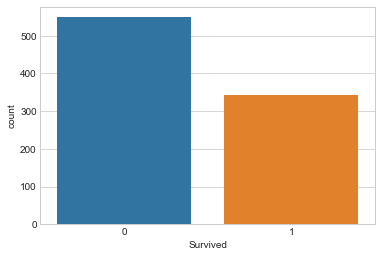

In [49]:
sns.countplot('Survived', data=train)

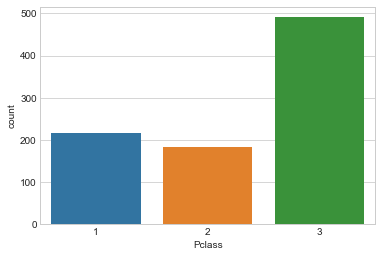

In [50]:
sns.countplot('Pclass', data=train)

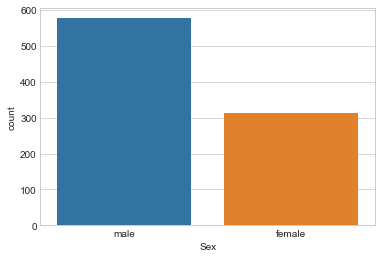

In [52]:
sns.countplot('Sex', data=train)

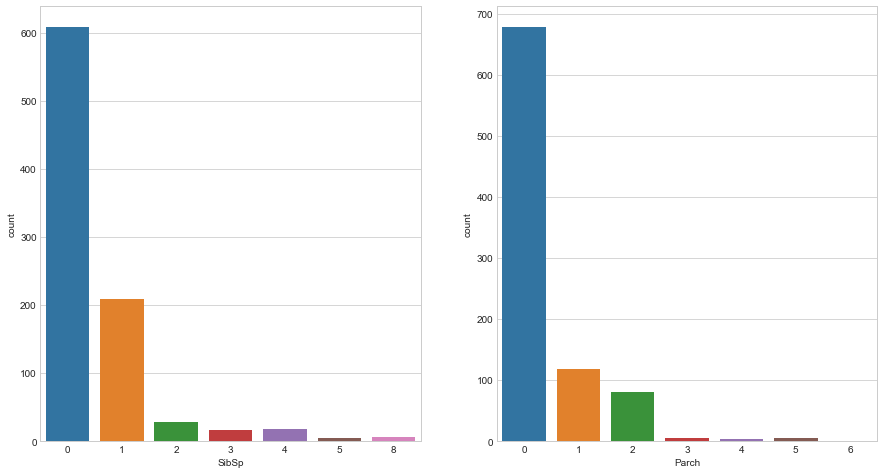

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot('SibSp', data=train, ax=axes[0])
sns.countplot('Parch', data=train, ax=axes[1])

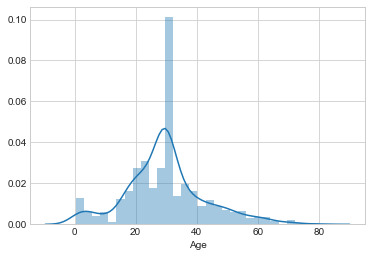

In [101]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
# train['Age'].isnull()
sns.distplot(train['Age'])

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.2+ KB


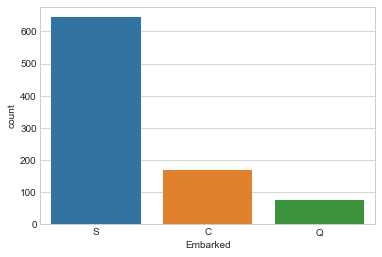

In [107]:
sns.countplot('Embarked', data=train)

In [110]:
train_new = pd.get_dummies(train['Embarked'], prefix='Embarked')

In [115]:
# train['Embarked_C', 'Embarked_Q', 'Embarked_S'] = train_new['Embarked_C', 'Embarked_Q', 'Embarked_S']
list = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
for x in list:
    train[x] = train_new[x]

In [116]:
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1,0,0


In [120]:
train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [128]:
train.drop('Embarked', axis = 1, inplace=True)

In [133]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [132]:
# male ->0
# female -> 1
train['Sex'].replace('male', 0, inplace=True) 
train['Sex'].replace('female', 1, inplace=True)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [136]:
train.drop('PassengerId', axis = 1, inplace=True)
train.drop('Name', axis = 1, inplace=True)
train.drop('Cabin', axis = 1, inplace=True)

In [138]:
train[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,1,1,1,38.000000,1,0,PC 17599,71.2833,1,0,0
2,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,1,35.000000,1,0,113803,53.1000,0,0,1
4,0,3,0,35.000000,0,0,373450,8.0500,0,0,1
5,0,3,0,29.699118,0,0,330877,8.4583,0,1,0
6,0,1,0,54.000000,0,0,17463,51.8625,0,0,1
7,0,3,0,2.000000,3,1,349909,21.0750,0,0,1
8,1,3,1,27.000000,0,2,347742,11.1333,0,0,1
9,1,2,1,14.000000,1,0,237736,30.0708,1,0,0


In [141]:
# train['Ticket']
# sns.countplot('Ticket', data=train)
# train['Ticket']
train.drop('Ticket', axis = 1, inplace = True)

In [142]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [154]:
# 使用XGBoost模型进行预测
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.ix[:,1:]
Y = train.ix[:,0]

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-13 13:55:19.361172. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [155]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-10-13 13:55:31.266440. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [158]:
max_depth_num=3
model = XGBClassifier(learning_rate=0.1, max_depth=max_depth_num, booster='gbtree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [159]:
accuracy

0.79661016949152541

In [162]:
test = pd.read_csv(path2)
test[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [163]:
test.drop('Name', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
# test.drop

In [164]:
test[:5]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [165]:
test_new = pd.get_dummies(test['Embarked'], prefix='Embarked')

In [166]:
test_new

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


In [167]:
list = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
for x in list:
    test[x] = test_new[x]
test.drop('Embarked', axis = 1, inplace = True)

In [170]:
test.replace('male', 0, inplace = True)
test.replace('female', 1, inplace = True)

In [171]:
test['Age'].fillna(test['Age'].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
5      14.00000
6      30.00000
7      26.00000
8      18.00000
9      21.00000
10     30.27259
11     46.00000
12     23.00000
13     63.00000
14     47.00000
15     24.00000
16     35.00000
17     21.00000
18     27.00000
19     45.00000
20     55.00000
21      9.00000
22     30.27259
23     21.00000
24     48.00000
25     50.00000
26     22.00000
27     22.50000
28     41.00000
29     30.27259
         ...   
388    21.00000
389     6.00000
390    23.00000
391    51.00000
392    13.00000
393    47.00000
394    29.00000
395    18.00000
396    24.00000
397    48.00000
398    22.00000
399    31.00000
400    30.00000
401    38.00000
402    22.00000
403    17.00000
404    43.00000
405    20.00000
406    23.00000
407    50.00000
408    30.27259
409     3.00000
410    30.27259
411    37.00000
412    28.00000
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, 

In [172]:
test[:5]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [175]:
kaggle_test = test.ix[:, 1:]

In [176]:
kaggle_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
5,3,0,14.0,0,0,9.2250,0,0,1
6,3,1,30.0,0,0,7.6292,0,1,0
7,2,0,26.0,1,1,29.0000,0,0,1
8,3,1,18.0,0,0,7.2292,1,0,0
9,3,0,21.0,2,0,24.1500,0,0,1


In [177]:
prediction = model.predict(kaggle_test)

In [178]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0,

In [179]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })
submission.to_csv('my_titanic.csv', index=False)